# load library

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

# load data

In [59]:
income_df = pd.read_csv('data/서울시 상권분석서비스(소득소비-행정동).csv', index_col=0, encoding='cp949')
income_df

,행정동_코드,행정동_코드.1,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
기준_년분기_코드,,,,,,,,,,,,,,,,
20191,11680,11680600,대치1동,7694017,10,1.028099e+10,1.325045e+09,9426000,19817000,1401214000,13477000.0,5531740000,71400000,3.916270e+08,302312000.0,1214934000
20192,11680,11680600,대치1동,7694017,10,1.053540e+10,1.429272e+09,22341000,13626000,1442060000,9265000.0,5522667000,76726000,4.016650e+08,360127000.0,1257651000
20193,11680,11680600,대치1동,7694017,10,1.355173e+10,1.568212e+09,13391000,13591000,1603123000,10772000.0,8102165000,88800000,3.590670e+08,406770000.0,1385843000
20241,11680,11680600,대치1동,7421305,10,4.992270e+09,4.305700e+08,23453000,369000,660921000,7925000.0,2713495000,16073000,5.795140e+08,187389000.0,372561000
20242,11680,11680600,대치1동,7421305,10,1.437666e+10,1.324309e+09,53139000,2950000,2104821000,13688000.0,7445592000,50156000,1.713160e+09,482778000.0,1186069000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20223,11320,11320700,방학2동,2099146,5,2.105358e+09,8.694010e+08,39400000,24333000,356349000,227431000.0,68122000,42265000,6.048100e+07,41518000.0,376058000
20224,11320,11320700,방학2동,2099146,5,2.061313e+09,8.802830e+08,38742000,42298000,366665000,177038000.0,61805000,37356000,5.367800e+07,42069000.0,361379000
20232,11320,11320700,방학2동,2099146,5,2.257881e+09,9.973180e+08,44228000,27178000,416356000,164562000.0,54798000,33967000,5.511700e+07,48249000.0,416108000


In [60]:
logistic_df = pd.read_csv('preprocessed data/logistic_clustered_df.csv',index_col=0) #원본 데이터
logistic_df

,자치구명,동일세대_학령기인구수,동일세대_미취학아동수,직업군,평균_문자대상자수,평균_통화대상자수,평균_통화량,세대주여부,1인가구여부,주택보유여부,...,평일_이동속도_평균,휴일_총이동거리,휴일_이동속도_평균,택시이용_이동횟수,네비게이션이용_이동횟수,지하철_이동일수,AGE,SEX,INCOME,logistic_cluster
0,강동구,3,0,420,NaN,NaN,NaN,세대주,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,40대,M,300이상500만원 미만,0
1,도봉구,2,0,420,NaN,NaN,NaN,세대주,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,60대,M,300만원 미만,0
2,동작구,2,0,420,NaN,NaN,NaN,세대주,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,60대,M,300만원 미만,0
3,동대문구,2,0,420,NaN,NaN,NaN,세대주,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,40대,F,300이상500만원 미만,0
4,서초구,0,0,420,28.0,6.0,91.0,세대주,0,1,...,31.0,470.0,39.0,0.0,0.0,9.0,60대,F,300만원 미만,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,서초구,1,0,510,NaN,NaN,NaN,세대주,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,60대,M,300만원 미만,0
996,강남구,0,0,440,120.0,45.0,1000.0,세대주,0,0,...,48.0,5700.0,79.0,23.0,100.0,150.0,60대,M,500이상700만원 미만,1
997,구로구,0,0,510,76.0,15.0,160.0,세대주,0,1,...,30.0,2900.0,39.0,84.0,38.0,190.0,60대,M,300이상500만원 미만,0
998,마포구,3,1,510,NaN,NaN,NaN,세대주,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,40대,M,300이상500만원 미만,0


In [61]:
pop_df = pd.read_csv('data/서울시 상권분석서비스(길단위인구-상권).csv', encoding='cp949')
pop_df = pop_df[pop_df['기준_년분기_코드']==20251]
pop_df

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,20251,U,관광특구,3001496,강남 마이스 관광특구,100649,49922,50727,7069,20015,...,25342,20967,5110,14344,15196,15603,16864,16517,11758,10364
1,20251,U,관광특구,3001495,잠실 관광특구,4111537,1965328,2146209,427780,940714,...,657648,892677,483424,567968,565945,571332,585964,610821,633585,575923
2,20251,U,관광특구,3001494,종로?청계 관광특구,8147936,4304865,3843069,329308,1502435,...,1732364,1610382,642889,1232214,1266236,1237661,1298328,1323789,1046011,743696
3,20251,U,관광특구,3001493,동대문패션타운 관광특구,3304504,1540376,1764127,175313,630426,...,526153,637103,392709,505977,514359,503640,519249,504092,385614,371573
4,20251,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,6931325,3333639,3597687,320273,1208624,...,1710008,1314562,343316,1067275,1115314,1076686,1139517,1159683,793391,579458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,20251,A,골목상권,3110005,세검정,96805,43765,53040,16076,9714,...,10247,15208,13320,13613,13567,13615,13351,13471,13643,15543
1646,20251,A,골목상권,3110004,대신고등학교,684794,310748,374047,131977,81704,...,92082,127564,86959,96638,97126,97351,97282,97410,100914,98075
1647,20251,A,골목상권,3110003,세검정초등학교,325862,151464,174397,74251,35795,...,35838,53357,46230,46678,46631,46895,46450,46452,46261,46494
1648,20251,A,골목상권,3110002,독립문역 1번,506162,222935,283226,98439,55953,...,62302,87463,67180,70906,71116,71820,71474,71213,75986,73647


# data preprocessing

In [62]:
hot100_df = pop_df.sort_values(by=['총_유동인구_수'], ascending=False).iloc[:100]

In [63]:
# 남성&여성 유동인구 /총 유동인구
hot100_df['male_ratio'] = hot100_df['남성_유동인구_수'] / hot100_df['총_유동인구_수']
hot100_df['female_ratio'] = hot100_df['여성_유동인구_수'] / hot100_df['총_유동인구_수']


# 연령대 별 유동인구 수 비율
rules = ['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']
for rule in rules:
    hot100_df[f'{rule}_비율'] = hot100_df[rule]/hot100_df['총_유동인구_수']

# 평일 유동인구 max 값
hot100_df['week_max'] = hot100_df[['월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수']].max(axis=1)
# 주말 유동인구 max 값
hot100_df['weekend_max'] = hot100_df[['토요일_유동인구_수', '일요일_유동인구_수']].max(axis=1)

# 비유 구하는 식
hot100_df['평일_최대_인구_비율'] = (hot100_df['week_max'] / hot100_df['총_유동인구_수'])
hot100_df['주말_최대_인구_비율'] = (hot100_df['weekend_max'] / hot100_df['총_유동인구_수'])

# 시간대 비율
rules = ['시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수']
for rule in rules:
        hot100_df[f'{rule}_비율'] = hot100_df[rule]/hot100_df['총_유동인구_수']

# 컬럼명 리스트
weekday_cols = ['월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수']
weekend_cols = ['토요일_유동인구_수', '일요일_유동인구_수']
# 각 행에서 max 값의 컬럼 이름 찾기
hot100_df['week_max_day'] = hot100_df[weekday_cols].idxmax(axis=1)
hot100_df['weekend_max_day'] = hot100_df[weekend_cols].idxmax(axis=1)
# week_max_col, weekend_max_col 컬럼에서 요일명만 추출
hot100_df['week_max_day'] = hot100_df['week_max_day'].str.split('_').str[0]
hot100_df['weekend_max_day'] = hot100_df['weekend_max_day'].str.split('_').str[0]
hot100_df

#40~60대 비율 합계열
hot100_df['40_60_ratio'] = hot100_df[['연령대_50_유동인구_수_비율', '연령대_40_유동인구_수_비율', '연령대_60_이상_유동인구_수_비율']].sum(axis=1)

#40~60대 유동인구수
hot100_df['40~60대_유동인구_수'] = (
    hot100_df['연령대_40_유동인구_수'] +
    hot100_df['연령대_50_유동인구_수'] +
    hot100_df['연령대_60_이상_유동인구_수'])

#~30대 비율 합계열
hot100_df['~30_ratio'] = hot100_df[['연령대_10_유동인구_수_비율', '연령대_20_유동인구_수_비율', '연령대_30_유동인구_수_비율']].sum(axis=1)

#~30대 유동인구수
hot100_df['~30대_유동인구_수'] = (
    hot100_df['연령대_10_유동인구_수'] +
    hot100_df['연령대_20_유동인구_수'] +
    hot100_df['연령대_30_유동인구_수'])


# 분석

In [64]:
logistic1_df = logistic_df[logistic_df['logistic_cluster']==1]
logistic1_df

,자치구명,동일세대_학령기인구수,동일세대_미취학아동수,직업군,평균_문자대상자수,평균_통화대상자수,평균_통화량,세대주여부,1인가구여부,주택보유여부,...,평일_이동속도_평균,휴일_총이동거리,휴일_이동속도_평균,택시이용_이동횟수,네비게이션이용_이동횟수,지하철_이동일수,AGE,SEX,INCOME,logistic_cluster
9,강남구,0,0,420,NaN,NaN,NaN,세대주,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,40대,M,500이상700만원 미만,1
13,송파구,2,1,430,NaN,NaN,NaN,세대주,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,50대,M,500이상700만원 미만,1
21,양천구,3,0,510,45.0,12.0,360.0,세대주,0,1,...,43.0,920.0,29.0,23.0,2.0,140.0,60대,M,500이상700만원 미만,1
23,강서구,0,2,420,NaN,NaN,NaN,세대주,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,60대,M,500이상700만원 미만,1
41,중구,3,0,420,NaN,NaN,NaN,세대주,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,40대,M,500이상700만원 미만,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,서초구,1,0,420,28.0,12.0,16.0,세대주,0,0,...,40.0,530.0,37.0,76.0,22.0,81.0,60대,M,500이상700만원 미만,1
979,성북구,0,0,410,NaN,NaN,NaN,세대주,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,50대,M,500이상700만원 미만,1
983,강서구,0,3,420,NaN,NaN,NaN,세대주,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,40대,M,500이상700만원 미만,1
993,노원구,1,2,410,NaN,NaN,NaN,세대주,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,40대,M,500이상700만원 미만,1


C:\Users\top\AppData\Local\Temp\ipykernel_2180\3835370466.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_labels, y=age_sizes, ax=axs[1], palette='pastel')
C:\Users\top\AppData\Local\Temp\ipykernel_2180\3835370466.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_labels, y=income_sizes, ax=axs[2], palette='pastel')


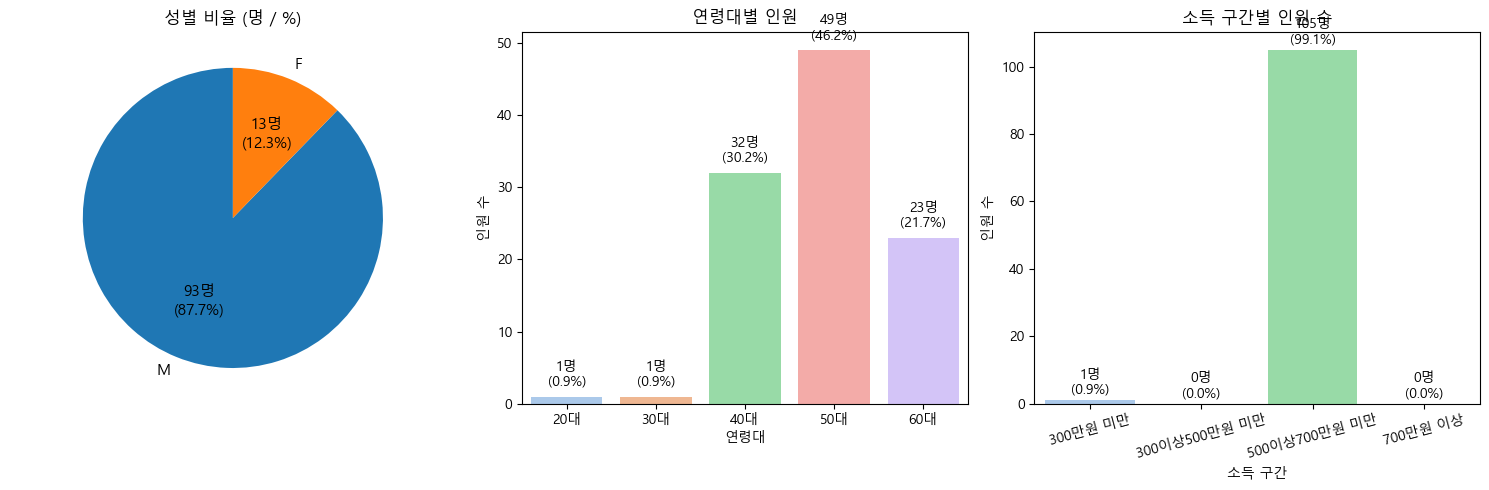

In [65]:
# 1. 성별 인원수 계산
sex_counts = logistic1_df['SEX'].value_counts()
sex_labels = sex_counts.index
sex_sizes = sex_counts.values
total_sex = sex_sizes.sum()

# 2. 연령대 인원수 계산
age_counts = logistic1_df['AGE'].value_counts().sort_index()
age_labels = age_counts.index
age_sizes = age_counts.values
total_age = age_sizes.sum()

# 3. 소득구간 인원수 계산
income_order = ['300만원 미만', '300이상500만원 미만', '500이상700만원 미만', '700만원 이상']
income_counts = logistic1_df['INCOME'].value_counts().reindex(income_order, fill_value=0)
income_labels = income_counts.index
income_sizes = income_counts.values
total_income = income_sizes.sum()

# ▶ subplot 생성
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# [0] 성별 파이 차트 (인원 + 퍼센트)
wedges, texts, autotexts = axs[0].pie(
    sex_sizes,
    labels=sex_labels,
    autopct='%.1f%%',
    startangle=90,
    textprops=dict(fontsize=11)
)
axs[0].axis('equal')
axs[0].set_title("성별 비율 (명 / %)")

# 인원 수 + 퍼센트 표기 (ex: 123명\n45.6%)
for i, a in enumerate(autotexts):
    percent = float(a.get_text().replace('%', ''))
    a.set_text(f"{sex_sizes[i]}명\n({percent:.1f}%)")

# [1] 연령대 막대그래프 (인원 + 퍼센트)
sns.barplot(x=age_labels, y=age_sizes, ax=axs[1], palette='pastel')
axs[1].set_title("연령대별 인원")
axs[1].set_ylabel("인원 수")
axs[1].set_xlabel("연령대")
for idx, val in enumerate(age_sizes):
    pct = (val / total_age) * 100
    axs[1].text(x=idx, y=val + total_age*0.01, s=f"{val}명\n({pct:.1f}%)", 
                ha='center', va='bottom', fontsize=10)

# [2] 소득구간 countplot (인원 + 퍼센트)
sns.barplot(x=income_labels, y=income_sizes, ax=axs[2], palette='pastel')
axs[2].set_title("소득 구간별 인원 수")
axs[2].set_xlabel("소득 구간")
axs[2].set_ylabel("인원 수")
axs[2].tick_params(axis='x', rotation=15)
for idx, val in enumerate(income_sizes):
    pct = (val / total_income) * 100
    axs[2].text(x=idx, y=val + total_income*0.01, s=f"{val}명\n({pct:.1f}%)",
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [66]:
# 소득이 300만원 미만이고 20대, 30대인 사람은 모두 여성
print(logistic1_df[logistic1_df['INCOME']=='300만원 미만']['SEX'])
print(logistic1_df[logistic1_df['AGE']=='20대']['SEX'].value_counts())
print(logistic1_df[logistic1_df['AGE']=='30대']['SEX'].value_counts())

631    F
Name: SEX, dtype: object
SEX
F    1
Name: count, dtype: int64
SEX
F    1
Name: count, dtype: int64


중간 결론1:  포집된 클러스터는 대부분은 40~60대의 중장년층 직장인

중간 결론2: 주말 끼고 연차 한 장 쓰는 패턴이 38% -> 평일 광고를 통해 이익 극대화 필요

중간 결론2: 4분위(비수기)에 영업 이익 전환을 위한 최소한의 수송률인 80%을 넘기기 위해, 땡처리 항공권의 광고 지역 선정(팜플랏, 현수막, 옥외광고, 지하철 광고 등)

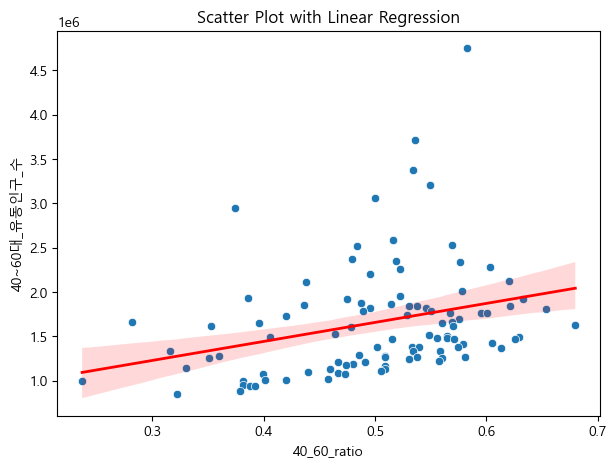

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
# 산점도만 먼저
sns.scatterplot(
    data=hot100_df, 
    x='40_60_ratio', 
    y='40~60대_유동인구_수'
)
# 회귀선만 별도로 regplot, 기존 scatter와 색/alpha 다르게
sns.regplot(
    data=hot100_df,
    x='40_60_ratio',
    y='40~60대_유동인구_수',
    scatter=False,   # 점은 따로
    line_kws={'color':'red', 'lw':2}
)
plt.title('Scatter Plot with Linear Regression')
plt.show()


In [68]:
hot100_df

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,시간대_11_14_유동인구_수_비율,시간대_14_17_유동인구_수_비율,시간대_17_21_유동인구_수_비율,시간대_21_24_유동인구_수_비율,week_max_day,weekend_max_day,40_60_ratio,40~60대_유동인구_수,~30_ratio,~30대_유동인구_수
2,20251,U,관광특구,3001494,종로?청계 관광특구,8147936,4304865,3843069,329308,1502435,...,0.207715,0.212614,0.197643,0.078902,금요일,토요일,0.582911,4749524,0.417089,3398413
371,20251,D,발달상권,3120189,강남역,7866923,3898872,3968051,751959,2145506,...,0.182265,0.190120,0.222553,0.097940,금요일,토요일,0.374588,2946857,0.625412,4920066
4,20251,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,6931325,3333639,3597687,320273,1208624,...,0.247383,0.246707,0.189655,0.049531,금요일,토요일,0.535964,3714942,0.464036,3216384
1117,20251,A,골목상권,3110533,충정로역 7번,6331387,3075427,3255960,629993,926536,...,0.154371,0.152630,0.137383,0.098793,목요일,토요일,0.534174,3382063,0.465826,2949326
994,20251,A,골목상권,3110656,까치산역 3번,6123024,2917173,3205849,500406,1210268,...,0.113489,0.112460,0.163065,0.132690,월요일,일요일,0.500159,3062487,0.499841,3060538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,20251,A,골목상권,3110348,강북문화예술회관,2233659,1017628,1216031,358091,260743,...,0.095441,0.095905,0.141930,0.133614,수요일,일요일,0.613180,1369635,0.386820,864025
748,20251,A,골목상권,3110902,사당역 4번,2224665,1064643,1160023,282949,391831,...,0.108172,0.107012,0.161369,0.132624,월요일,일요일,0.509256,1132923,0.490744,1091742
470,20251,D,발달상권,3120090,연신내역,2199056,1019228,1179828,218929,398644,...,0.127675,0.136817,0.196604,0.130607,금요일,토요일,0.557341,1225623,0.442660,973434
825,20251,A,골목상권,3110825,신대방삼거리역 1번,2197092,1006954,1190138,294613,398632,...,0.093860,0.090167,0.144687,0.142603,월요일,일요일,0.505620,1110894,0.494379,1086197


In [69]:
# 
hot100_df['score'] = hot100_df['40_60_ratio']*hot100_df['40~60대_유동인구_수']-hot100_df['~30_ratio']*hot100_df['~30대_유동인구_수']

In [70]:
tmp_df = hot100_df.sort_values('score',ascending=False)[['상권_코드_명','score','male_ratio','female_ratio']]
tmp_df = tmp_df[tmp_df['score']>0]
tmp_df = tmp_df[tmp_df['male_ratio']>0.5]
tmp_df

,상권_코드_명,score,male_ratio,female_ratio
2,종로?청계 관광특구,1.351111e+06,0.528338,0.471662
940,남구로역 3번,8.609960e+05,0.522828,0.477172
933,남구로역 2번,5.904690e+05,0.503007,0.496993
551,종로3가역,5.791022e+05,0.543600,0.456400
554,종각역,1.042100e+04,0.546305,0.453694


In [71]:
hot100_df[hot100_df['상권_코드_명']=='종각역']
hot100_df = hot100_df[hot100_df['score']>0]
hot100_df = hot100_df[hot100_df['male_ratio']>0.5]
hot100_df

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,시간대_14_17_유동인구_수_비율,시간대_17_21_유동인구_수_비율,시간대_21_24_유동인구_수_비율,week_max_day,weekend_max_day,40_60_ratio,40~60대_유동인구_수,~30_ratio,~30대_유동인구_수,score
2,20251,U,관광특구,3001494,종로?청계 관광특구,8147936,4304865,3843069,329308,1502435,...,0.212614,0.197643,0.078902,금요일,토요일,0.582911,4749524,0.417089,3398413,1.351111e+06
551,20251,D,발달상권,3120009,종로3가역,5845132,3177416,2667716,267492,1212514,...,0.212363,0.218531,0.085237,금요일,토요일,0.549537,3212118,0.450463,2633016,5.791022e+05
933,20251,A,골목상권,3110717,남구로역 2번,2940575,1479130,1461445,300793,331977,...,0.111048,0.171488,0.129021,수요일,일요일,0.600400,1765522,0.399600,1175053,5.904690e+05
554,20251,D,발달상권,3120006,종각역,2758592,1507033,1251558,114049,620817,...,0.215550,0.218863,0.077358,금요일,토요일,0.501889,1384507,0.498111,1374086,1.042100e+04
940,20251,A,골목상권,3110710,남구로역 3번,2394522,1251923,1142598,136376,249358,...,0.130586,0.182639,0.126829,월요일,일요일,0.679785,1627759,0.320215,766763,8.609960e+05


# 분석2

# data preprocessing

In [72]:
income_df = income_df.loc[20251]
income_df.sort_values(['월_평균_소득_금액'])
income_df

,행정동_코드,행정동_코드.1,행정동_코드_명,월_평균_소득_금액,소득_구간_코드,지출_총금액,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
기준_년분기_코드,,,,,,,,,,,,,,,,
20251,11680,11680600,대치1동,7421305,10,1.258412e+10,1.178109e+09,24160000,1686000,2043369000,1.313800e+07,6621256000,55453000,1.030729e+09,4.304190e+08,1185804000
20251,11650,11650570,반포2동,6812331,9,1.864719e+09,3.876260e+08,12346000,48000,243493000,1.177400e+07,460788000,0,7.506900e+07,1.088930e+08,564682000
20251,11680,11680656,도곡2동,6567504,9,6.659043e+10,1.153189e+09,211048000,103872000,855672000,2.620160e+08,477425000,75603000,6.050169e+10,5.528920e+08,2397024000
20251,11650,11650531,서초4동,6475383,9,3.658834e+10,1.704802e+09,1127185000,111094000,21853904000,3.697150e+08,1437687000,1488135000,1.473724e+09,1.007903e+09,6014187000
20251,11710,11710670,잠실2동,6352641,9,3.220268e+09,4.740570e+08,106758000,5357000,1306628000,8.250000e+06,474445000,0,2.556940e+08,2.098690e+08,379210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20251,11305,11305615,수유1동,2220463,5,4.724271e+09,2.083309e+09,116578000,123899000,423041000,5.307330e+08,26352000,44116000,3.219290e+08,2.338060e+08,820508000
20251,11305,11305635,수유3동,2205999,5,1.097154e+10,1.486702e+09,181301000,88330000,1767451000,5.000830e+08,82711000,1131495000,8.222120e+08,5.671680e+08,4344086000
20251,11470,11470580,신월3동,2152244,5,2.442662e+09,5.165350e+08,20806000,19362000,241073000,1.146956e+09,71123000,25578000,4.183700e+07,6.307400e+07,296318000


In [73]:
int(len(income_df)*0.25), int(len(income_df)*0.5) # 상위 25-50% 소득 구간
income_25_50_df = income_df.iloc[int(len(income_df)*0.25):int(len(income_df)*0.5)][['행정동_코드_명', '월_평균_소득_금액']]
income_25_50_df

,행정동_코드_명,월_평균_소득_금액
기준_년분기_코드,,
20251,응봉동,3858472
20251,수서동,3847379
20251,신대방1동,3845094
20251,상도2동,3826699
20251,원효로2동,3817026
...,...,...
20251,화곡3동,3132782
20251,상계10동,3132098
20251,송파1동,3129216


In [74]:
for i in income_25_50_df['행정동_코드_명'].tolist():
    print(i, end=', ')

응봉동, 수서동, 신대방1동, 상도2동, 원효로2동, 청운효자동, 금호2?3가동, 길음2동, 삼각산동, 명동, 상일동, 암사2동, 이태원1동, 청림동, 양평2동, 홍제2동, 부암동, 하계2동, 동화동, 신길7동, 하계1동, 역삼1동, 둔촌1동, 이촌2동, 돈암1동, 노량진1동, 영등포동, 용문동, 문정1동, 청구동, 가양1동, 개포4동, 창4동, 명일1동, 답십리1동, 당산1동, 대방동, 효창동, 가락본동, 성산2동, 오금동, 응암2동, 양평1동, 가회동, 왕십리2동, 성북동, 홍제1동, 성현동, 삼청동, 성내1동, 목4동, 대흥동, 둔촌2동, 방화1동, 등촌3동, 공릉2동, 연희동, 종암동, 구로1동, 성수2가3동, 등촌2동, 정릉1동, 신대방2동, 혜화동, 신촌동, 등촌1동, 창5동, 월곡1동, 영등포본동, 논현1동, 장지동, 성수1가2동, 난향동, 이태원2동, 수색동, 황학동, 종로1?2?3?4가동, 목2동, 남가좌2동, 남현동, 광희동, 낙성대동, 양재2동, 회기동, 구로5동, 서교동, 충현동, 중계4동, 합정동, 발산1동, 남영동, 불광1동, 시흥2동, 천호3동, 보문동, 신정3동, 상계8동, 상계6?7동, 월곡2동, 이문2동, 전농2동, 화곡3동, 상계10동, 송파1동, 상계2동, 묵1동, 

In [75]:
for i in pop_df['상권_코드_명']:
    print(i, end=', ')

강남 마이스 관광특구, 잠실 관광특구, 종로?청계 관광특구, 동대문패션타운 관광특구, 명동 남대문 북창동 다동 무교동 관광특구, 이태원 관광특구, 평화시장(남평화시장, 제일평화시장, 신평화패션타운), 고덕 골목형상점가, 명일전통시장, 길동복조리시장, 둔촌역전통시장, 고분다리전통시장, 장신구 특화거리 상점가, 암사종합시장, 성내전통시장, 로데오거리상점가, 마천중앙시장, 마천시장, 문정동 로데오거리 상점가(문정동 로데오거리), 풍납시장, 방이시장, 석촌시장, 새마을시장, 강남개포시장, 은마종합상점가, 청담삼익시장, 도곡시장, 강남언주로, 논현종합시장, 신사상가, 영동전통시장, 강남시장(강남구 강남시장), 양재시장, 남부종합시장, 인헌시장(원당종합시장), 관악중부시장, 봉천중앙시장, 봉천현대시장, 봉천제일종합시장, 영림시장, 봉일시장, 신림현대종합상가, 삼성동 시장(삼성동시장), 신신림시장(삼성동시장), 서원동상점가, 관악종합시장(신원시장), 신원시장, 난곡 골목형상점가, 우림시장, 신림종합시장, 관악신사시장, 미성동 도깨비시장 골목형상점가, 조원동 펭귄시장(신림중앙시장), 신림중앙시장(조원동 펭귄시장), 강남골목시장, 사당1동먹자골목상점가(사당1동먹자골목), 남성사계시장(남성시장), 사당시장, 남성역골목시장, 흑석시장, 강남시장(동작구 강남시장), 상도전통시장, 본동인정시장(기능상실), 만양로상점가, 노량진중앙시장, 상도약수골목형상점가, 신노량진시장(기능상실), 상도도깨비 골목형상점가, 성대전통시장(성대시장), 신대방1동골목상권, 대신시장, 영진시장A동, 영등포시장기계공구상가, 신동시장, 영등포전통시장, 남서울상가, 영신상가(제일상가), 삼구시장(로타리상가), 동남상가, 영등포역지하도상점가, 우리시장, 영등포청과시장(조광시장), 영일시장, 대림중앙시장, 도림시장, 대림중앙 골목형상점가, 선유도역 골목형상점가, 영등포유통상가, 양남시장, 은행나무시장, 박미시장(기능상실), 비단길현대시장(현대시장), 대명여울빛거리시장(대명시장), 푸른터시장(기능상실), 남문시장, 독

In [76]:
# gpt에게 상권 코드가 있는 상권 리스트를 요청
target_sangguen_list = [
    "강남 마이스 관광특구",
    "명동 남대문 북창동 다동 무교동 관광특구",
    "종로?청계 관광특구",
    "이태원 관광특구",
    "문정동 로데오거리 상점가(문정동 로데오거리)",
    "명일전통시장",
    "길동복조리시장",
    "둔촌역전통시장",
    "고분다리전통시장",
    "암사종합시장",
    "성내전통시장",
    "방이시장",
    "도곡시장",
    "강남개포시장",
    "강남시장(강남구 강남시장)",
    "신림종합시장",
    "신림현대종합상가",
    "신신림시장(삼성동시장)",
    "난곡 골목형상점가",
    "미성동 도깨비시장 골목형상점가",
    "신대방1동골목상권",
    "사당1동먹자골목상점가(사당1동먹자골목)",
    "노량진중앙시장",
    "상도전통시장",
    "상도약수골목형상점가",
    "성대전통시장(성대시장)",
    "흑석시장",
    "이촌종합시장",
    "영등포전통시장",
    "영등포시장기계공구상가",
    "영등포역지하도상점가",
    "영등포청과시장(조광시장)",
    "도림시장",
    "당산역 8번",
    "양평역",
    "구로시장",
    "남구로시장",
    "신정3동 골목시장",
    "목2동시장",
    "목사랑시장(목4동시장)",
    "화곡본동시장",
    "등촌3동주민센터",
    "공항시장",
    "신월중앙시장",
    "마포시장",
    "홍대 걷고싶은 거리",
    "홍대소상공인상점가",
    "서교시장",
    "합정시장",
    "인왕시장(홍제골목형상점가)",
    "신촌 상인회(신촌상점가)",
    "연희사러가",
    "응암시장(신응암시장)",
    "응암오거리상점가",
    "공릉동 도깨비시장",
    "수색동",
    "상계중앙시장",
    "상계역전종합상가",
    "상계주공1단지(가)상가",
    "상계5동주민센터",
    "돌곶이시장(석관황금시장)",
    "길음시장",
    "돈암시장(돈암제일시장)",
    "정릉시장",
    "정릉아리랑시장",
    "보문역 4번",
    "이문제일시장",
    "답십리현대시장",
    "답십리시장",
    "회기시장",
    "황학시장(서울중앙시장, 신중앙시장)",
    "청구역 1번",
    "청평화시장",
    "동화동 골목형상점가",
    "후암시장",
    "효창동주민센터",
    "부암동주민센터",
    "삼청동",
    "연희동",
    "홍제역 2번"
]


In [78]:
# 소득이 상위 25-50% 구간에 해당하는 행정동에 위치한 상권 리스트
pop_target_df = pop_df[pop_df['상권_코드_명'].isin(target_sangguen_list)]
pop_target_df

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_24_유동인구_수,월요일_유동인구_수,화요일_유동인구_수,수요일_유동인구_수,목요일_유동인구_수,금요일_유동인구_수,토요일_유동인구_수,일요일_유동인구_수
0,20251,U,관광특구,3001496,강남 마이스 관광특구,100649,49922,50727,7069,20015,...,25342,20967,5110,14344,15196,15603,16864,16517,11758,10364
2,20251,U,관광특구,3001494,종로?청계 관광특구,8147936,4304865,3843069,329308,1502435,...,1732364,1610382,642889,1232214,1266236,1237661,1298328,1323789,1046011,743696
4,20251,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,6931325,3333639,3597687,320273,1208624,...,1710008,1314562,343316,1067275,1115314,1076686,1139517,1159683,793391,579458
5,20251,U,관광특구,3001491,이태원 관광특구,2053162,1067155,986007,131284,500244,...,299846,401109,263612,268102,260403,271285,271380,299503,357006,325485
8,20251,R,전통시장,3130325,명일전통시장,322930,143555,179374,57449,34456,...,43734,65330,40601,44838,44714,45592,44716,46224,47431,49411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222,20251,A,골목상권,3110428,상계5동주민센터,3417966,1537663,1880304,513219,396853,...,339213,519199,470514,486357,479644,484963,477740,474439,497730,517094
1346,20251,A,골목상권,3110304,보문역 4번,1062301,482592,579709,128086,297135,...,137260,186396,126018,151247,150749,150391,152554,151406,151730,154224
1589,20251,A,골목상권,3110061,효창동주민센터,1219872,561657,658213,178553,173728,...,128388,190830,166083,173840,172535,173206,170372,170751,176192,182975
1597,20251,A,골목상권,3110053,청구역 1번,912789,445426,467364,50592,136531,...,109770,143802,110598,131010,131715,130479,132194,132456,127075,127858


In [88]:
# 남성&여성 유동인구 /총 유동인구
pop_target_df['male_ratio'] = pop_target_df['남성_유동인구_수'] / pop_target_df['총_유동인구_수']
pop_target_df['female_ratio'] = pop_target_df['여성_유동인구_수'] / pop_target_df['총_유동인구_수']


# 연령대 별 유동인구 수 비율
rules = ['연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수']
for rule in rules:
    pop_target_df[f'{rule}_비율'] = pop_target_df[rule]/pop_target_df['총_유동인구_수']

# 평일 유동인구 max 값
pop_target_df['week_max'] = pop_target_df[['월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수']].max(axis=1)
# 주말 유동인구 max 값
pop_target_df['weekend_max'] = pop_target_df[['토요일_유동인구_수', '일요일_유동인구_수']].max(axis=1)

# 비유 구하는 식
pop_target_df['평일_최대_인구_비율'] = (pop_target_df['week_max'] / pop_target_df['총_유동인구_수'])
pop_target_df['주말_최대_인구_비율'] = (pop_target_df['weekend_max'] / pop_target_df['총_유동인구_수'])

# 시간대 비율
rules = ['시간대_00_06_유동인구_수', '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_24_유동인구_수']
for rule in rules:
        pop_target_df[f'{rule}_비율'] = pop_target_df[rule]/pop_target_df['총_유동인구_수']

# 컬럼명 리스트
weekday_cols = ['월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수']
weekend_cols = ['토요일_유동인구_수', '일요일_유동인구_수']
# 각 행에서 max 값의 컬럼 이름 찾기
pop_target_df['week_max_day'] = pop_target_df[weekday_cols].idxmax(axis=1)
pop_target_df['weekend_max_day'] = pop_target_df[weekend_cols].idxmax(axis=1)
# week_max_col, weekend_max_col 컬럼에서 요일명만 추출
pop_target_df['week_max_day'] = pop_target_df['week_max_day'].str.split('_').str[0]
pop_target_df['weekend_max_day'] = pop_target_df['weekend_max_day'].str.split('_').str[0]
pop_target_df

#40~60대 비율 합계열
pop_target_df['40_60_ratio'] = pop_target_df[['연령대_50_유동인구_수_비율', '연령대_40_유동인구_수_비율', '연령대_60_이상_유동인구_수_비율']].sum(axis=1)

#40~60대 유동인구수
pop_target_df['40~60대_유동인구_수'] = (
    pop_target_df['연령대_40_유동인구_수'] +
    pop_target_df['연령대_50_유동인구_수'] +
    pop_target_df['연령대_60_이상_유동인구_수'])

#~30대 비율 합계열
pop_target_df['~30_ratio'] = pop_target_df[['연령대_10_유동인구_수_비율', '연령대_20_유동인구_수_비율', '연령대_30_유동인구_수_비율']].sum(axis=1)

#~30대 유동인구수
pop_target_df['~30대_유동인구_수'] = (
    pop_target_df['연령대_10_유동인구_수'] +
    pop_target_df['연령대_20_유동인구_수'] +
    pop_target_df['연령대_30_유동인구_수'])

# 유동인구 점수 계산
pop_target_df['score'] = pop_target_df['40_60_ratio']*pop_target_df['40~60대_유동인구_수']-pop_target_df['~30_ratio']*pop_target_df['~30대_유동인구_수']



C:\Users\top\AppData\Local\Temp\ipykernel_2180\3317192841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_target_df['male_ratio'] = pop_target_df['남성_유동인구_수'] / pop_target_df['총_유동인구_수']
C:\Users\top\AppData\Local\Temp\ipykernel_2180\3317192841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_target_df['female_ratio'] = pop_target_df['여성_유동인구_수'] / pop_target_df['총_유동인구_수']
C:\Users\top\AppData\Local\Temp\ipykernel_2180\3317192841.py:9: SettingWithCopyWarning: 
A value is trying to be set on 

# EDA

c:\Users\top\anaconda3\Lib\site-packages\seaborn\_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


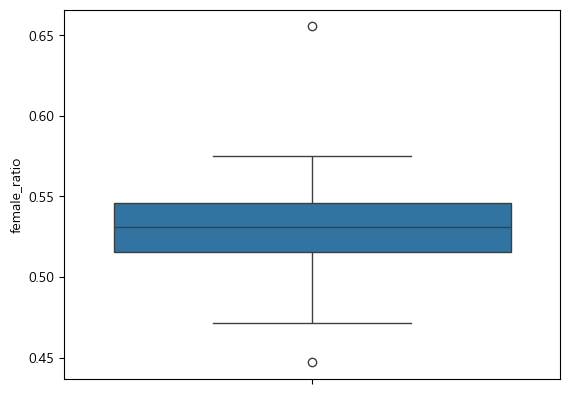

In [91]:
sns.boxplot(data=pop_target_df, y='female_ratio', orient='h')
plt.show()

In [99]:
tmp = pop_target_df.sort_values('female_ratio', ascending=False).iloc[:len(pop_target_df)//4]
tmp.sort_values('score', ascending=False).iloc[:1]


,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,...,시간대_14_17_유동인구_수_비율,시간대_17_21_유동인구_수_비율,시간대_21_24_유동인구_수_비율,week_max_day,weekend_max_day,40_60_ratio,40~60대_유동인구_수,~30_ratio,~30대_유동인구_수,score
1222,20251,A,골목상권,3110428,상계5동주민센터,3417966,1537663,1880304,513219,396853,...,0.099244,0.151903,0.137659,월요일,일요일,0.620492,2120821,0.379508,1297144,823676.759015
